In [182]:
a=3
import os
os.chdir('C:/python')

In [183]:
import tensorflow

In [184]:
import keras as kf

In [185]:
import pandas as pd

In [186]:
import torch

In [187]:
%pwd

'C:\\python'

#### 1. import libraries

In [188]:
import torch
from torch.utils.data import DataLoader


In [189]:
import torchvision
from torchvision import transforms, datasets
# from pathlib import Path
import os

In [190]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [191]:
torch.manual_seed(0)

2.Downloading data

In [192]:
dir_path_train='tomato/train'
dir_path_test='tomato/val'

transformer=torchvision.transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [193]:
datafolder_train=datasets.ImageFolder(root=dir_path_train, transform=transformer)

In [194]:
datafolder_test=datasets.ImageFolder(root=dir_path_test,transform=transformer)


In [195]:
print(datafolder_train[1])
plt.show(datafolder_train[1])

(tensor([[[0.5137, 0.4980, 0.4784,  ..., 0.4431, 0.4235, 0.4275],
         [0.4941, 0.4902, 0.4706,  ..., 0.4824, 0.5176, 0.4941],
         [0.5020, 0.5098, 0.4980,  ..., 0.4745, 0.5020, 0.5098],
         ...,
         [0.6157, 0.6235, 0.6314,  ..., 0.6078, 0.6196, 0.6353],
         [0.6118, 0.6157, 0.6196,  ..., 0.6353, 0.6471, 0.6627],
         [0.6157, 0.6667, 0.6353,  ..., 0.6275, 0.6196, 0.6157]],

        [[0.4549, 0.4392, 0.4196,  ..., 0.3843, 0.3647, 0.3686],
         [0.4353, 0.4314, 0.4118,  ..., 0.4235, 0.4588, 0.4353],
         [0.4431, 0.4510, 0.4392,  ..., 0.4157, 0.4431, 0.4510],
         ...,
         [0.5725, 0.5804, 0.5882,  ..., 0.5647, 0.5765, 0.5922],
         [0.5686, 0.5725, 0.5765,  ..., 0.5922, 0.6039, 0.6196],
         [0.5725, 0.6235, 0.5922,  ..., 0.5843, 0.5765, 0.5725]],

        [[0.4431, 0.4275, 0.4078,  ..., 0.3569, 0.3373, 0.3412],
         [0.4235, 0.4196, 0.4000,  ..., 0.3961, 0.4314, 0.4078],
         [0.4314, 0.4392, 0.4275,  ..., 0.3882, 0.4157, 0

In [196]:
print(type(datafolder_train[0][0]))

<class 'torch.Tensor'>


## 쿠다 사용 체크 & 텐서 데이터를 이미지 데이터로 변환

In [197]:
device='cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [198]:
from torchvision.transforms.functional import to_pil_image


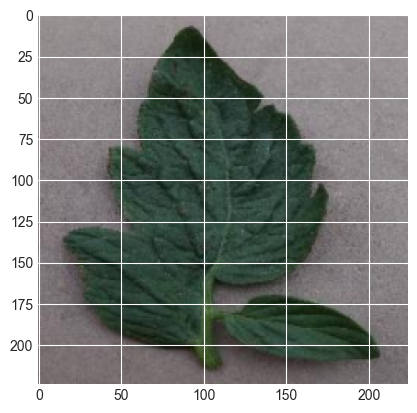

In [199]:
plt.imshow(to_pil_image(datafolder_train[0][0]), cmap='gray')

In [200]:
train_set_size, test_set_size=len(datafolder_train), len(datafolder_test)
print("Train size:", train_set_size,'\nTest size:', test_set_size)

Train size: 10000 
Test size: 1000


#### 리스트안에 있는 텐서에서 이미지 그림 추출하는 법 2번째

In [201]:
classes=datafolder_train.classes
classes

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [202]:
img, label=datafolder_train[0]
print(img.shape)                  
img_sample=img.permute(1,2,0)
print(img_sample.shape)

torch.Size([3, 224, 224])
torch.Size([224, 224, 3])


Image shape: torch.Size([3, 224, 224])
Num of classes: 10


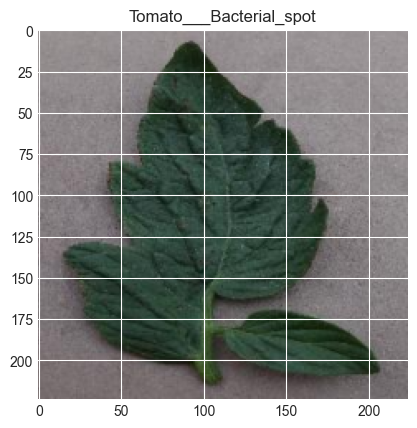

In [203]:
print('Image shape:', img.shape)
print('Num of classes:',len(classes))
plt.imshow(img_sample)
plt.title(classes[label]);

#### 3. Model preparation ( ResNet50 )

In [204]:
model=torchvision.models.resnet50(pretrained=True)

c:\python\variance\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\python\variance\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [205]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [60]:
# 신경망에 있는 모델의 모든 매개 변수들을 고정시킵니다.

for param in model.parameters():
    param.requires_grad=False

model.fc=torch.nn.Linear(2048, 10)

In [61]:
datafolder_train[0]

(tensor([[[0.5882, 0.5961, 0.6039,  ..., 0.6235, 0.6196, 0.6118],
          [0.6000, 0.6000, 0.6039,  ..., 0.6196, 0.6196, 0.6196],
          [0.6039, 0.6039, 0.6000,  ..., 0.6118, 0.6157, 0.6157],
          ...,
          [0.4667, 0.4588, 0.4549,  ..., 0.4627, 0.4471, 0.4588],
          [0.4706, 0.4627, 0.4627,  ..., 0.4667, 0.4627, 0.4667],
          [0.4706, 0.4588, 0.4667,  ..., 0.4745, 0.4824, 0.4588]],
 
         [[0.5647, 0.5725, 0.5804,  ..., 0.6000, 0.5961, 0.5882],
          [0.5765, 0.5765, 0.5804,  ..., 0.5961, 0.5961, 0.5961],
          [0.5804, 0.5804, 0.5765,  ..., 0.5882, 0.5922, 0.5922],
          ...,
          [0.4275, 0.4196, 0.4157,  ..., 0.4392, 0.4235, 0.4353],
          [0.4314, 0.4235, 0.4235,  ..., 0.4431, 0.4392, 0.4431],
          [0.4314, 0.4196, 0.4275,  ..., 0.4510, 0.4588, 0.4353]],
 
         [[0.5647, 0.5725, 0.5804,  ..., 0.6078, 0.6039, 0.5961],
          [0.5765, 0.5765, 0.5804,  ..., 0.6039, 0.6039, 0.6039],
          [0.5804, 0.5804, 0.5765,  ...,

#### 4. Training, testing

In [206]:
BATCH_SIZE=32

train_loader=DataLoader(dataset=datafolder_train,batch_size=BATCH_SIZE, shuffle=True)
test_loader=DataLoader(dataset=datafolder_test, batch_size=BATCH_SIZE)

## dataset(train_set, test_set)을 BATCH_SIZE만큼 train/test_random_sampler
## 규칙으로 load 해준다.

#### +) DataLoader의 내부 확인하기

In [65]:
train_iterator=iter(train_loader)
dir(train_iterator)

['_IterableDataset_len_called',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_base_seed',
 '_collate_fn',
 '_dataset',
 '_dataset_fetcher',
 '_dataset_kind',
 '_drop_last',
 '_index_sampler',
 '_next_data',
 '_next_index',
 '_num_workers',
 '_num_yielded',
 '_persistent_workers',
 '_pin_memory',
 '_pin_memory_device',
 '_prefetch_factor',
 '_profile_name',
 '_reset',
 '_sampler_iter',
 '_shared_seed',
 '_timeout',
 'next']

In [66]:
device='cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [67]:
loss_fn=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.01)

In [68]:
train_accuracy_history, train_loss_history=[], []
test_accuracy_history, test_loss_history=[], []

In [73]:
epoch=2
batch_period=100

for epoch in range(epoch):
    print(f'EPOCH {epoch}:')
    train_losses, train_acc=0, 0
    for batch, (X,y) in enumerate(train_loader):
        X=X.to(device)
        y=y.to(device)
        model.train()

        y_pred=model.forward(X)
        loss=loss_fn(y_pred, y)

        train_losses += loss.data.cpu()
        train_acc += (y_pred.argmax(dim=1)==y).float().sum().data.cpu()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % batch_period == batch_period - 1:

            train_acc /= (BATCH_SIZE * batch_period)
            train_losses /= batch_period
            train_accuracy_history.append(train_acc)
            train_loss_history.append(train_losses)

            print(f' Train loss: {train_losses: .4f} | Train accuracy: {train_acc: .3f}')
            train_losses, train_acc=0, 0

            model.eval()
            test_losses, test_acc=0, 0
            with torch.inference_mode():
                for Xt, yt in test_loader:
                    Xt=Xt.to(device)
                    y_test_pred=model(Xt)
                    loss_test=loss_fn(y_test_pred, yt)
                    test_losses +=loss_test.data.cpu()
                    test_acc += (y_test_pred.argmax(dim=1)==yt).float().sum().data.cpu()


                test_acc /= len(datafolder_test)
                test_losses /=len(test_loader)
                test_accuracy_history.append(test_acc)
                test_loss_history.append(test_losses)

            print(f'  Test loss: {test_losses: .4f} | Test acc: {test_acc:.3f}    ')






EPOCH 0:
 Train loss:  2.0245 | Train accuracy:  0.600
  Test loss:  0.7342 | Test acc: 0.765    
 Train loss:  0.6406 | Train accuracy:  0.789
  Test loss:  0.8433 | Test acc: 0.733    
 Train loss:  0.6479 | Train accuracy:  0.811
  Test loss:  1.3126 | Test acc: 0.736    
EPOCH 1:
 Train loss:  0.5190 | Train accuracy:  0.846
  Test loss:  0.6990 | Test acc: 0.823    
 Train loss:  0.5694 | Train accuracy:  0.836
  Test loss:  0.5992 | Test acc: 0.830    
 Train loss:  0.5861 | Train accuracy:  0.838
  Test loss:  0.8595 | Test acc: 0.812    


In [78]:
PATH='C:/python/'
torch.save(model,'model.pt')        # 전체 모델 저장
torch.save(model.state_dict(),PATH + 'model_state_dict.pt')
torch.save({
    'model': model.state_dict(),
    'optimizer': optimizer.state_dict()
}, PATH + 'all.tar')

# 여러 가지 값 저장, 학습 중 진행 상황 저장을 위해 epoch, loss 값 등 일반 scalar 값 저장 가능

##### 모델을 통째로 불러오기

In [158]:
model2=torch.load(PATH+'model.pt')

In [159]:
model2.eval()  # 모델 평가하기

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

##### 불러온 새로운 모델을 사용해 보기

In [160]:
import os
os.chdir('C:/python/tomato/train/Tomato___Tomato_mosaic_virus')

In [161]:
transform=transforms.ToTensor()

In [162]:
img=Image.open('3b990211-ec63-4cb4-a502-ca99b4764dfb___PSU_CG 2126.JPG')

In [163]:
input=transform(img)
input=input.unsqueeze(0)
print(input)
print(input.shape)

tensor([[[[0.4627, 0.4275, 0.3647,  ..., 0.5608, 0.5216, 0.4549],
          [0.4235, 0.4588, 0.3765,  ..., 0.3843, 0.6000, 0.5216],
          [0.4392, 0.2980, 0.4941,  ..., 0.6471, 0.4863, 0.5882],
          ...,
          [0.5569, 0.7059, 0.5922,  ..., 0.6902, 0.6941, 0.6863],
          [0.5098, 0.4745, 0.4824,  ..., 0.6627, 0.6784, 0.6824],
          [0.5647, 0.5529, 0.4980,  ..., 0.6902, 0.6353, 0.5725]],

         [[0.3961, 0.3608, 0.2980,  ..., 0.4941, 0.4549, 0.3882],
          [0.3569, 0.3922, 0.3098,  ..., 0.3176, 0.5333, 0.4549],
          [0.3725, 0.2314, 0.4275,  ..., 0.5804, 0.4196, 0.5216],
          ...,
          [0.5059, 0.6549, 0.5412,  ..., 0.6549, 0.6588, 0.6510],
          [0.4588, 0.4235, 0.4314,  ..., 0.6275, 0.6431, 0.6471],
          [0.5137, 0.5020, 0.4471,  ..., 0.6549, 0.6000, 0.5373]],

         [[0.4588, 0.4235, 0.3608,  ..., 0.5647, 0.5255, 0.4588],
          [0.4196, 0.4549, 0.3725,  ..., 0.3882, 0.6039, 0.5255],
          [0.4353, 0.2941, 0.4902,  ..., 0

(256, 256, 3)


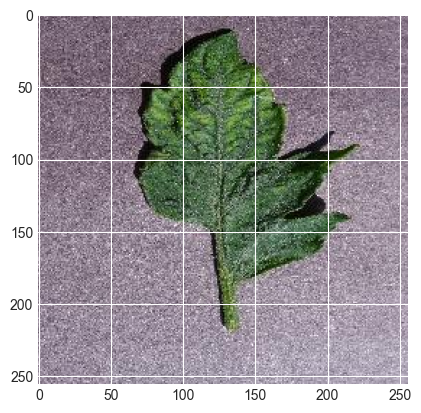

In [164]:
input2=input[0]
img_sample=input2.permute(1,2,0).numpy()
print(img_sample.shape)
plt.imshow(img_sample)

In [165]:
# 자료형이 numpy이기 때문에 Tensor로 바꾸어줘야 합니다.

print(type(img_sample))

<class 'numpy.ndarray'>


In [170]:
# img_sample 데이터를 훈련시키기 위해 numpy에서 Tensor 바꾸어줍니다.

img_sample1=torch.Tensor(img_sample)
print(img_sample1.shape)

print(img_sample1.shape)
img_sample1

torch.Size([256, 256, 3])
torch.Size([256, 256, 3])


tensor([[[0.4627, 0.3961, 0.4588],
         [0.4275, 0.3608, 0.4235],
         [0.3647, 0.2980, 0.3608],
         ...,
         [0.5608, 0.4941, 0.5647],
         [0.5216, 0.4549, 0.5255],
         [0.4549, 0.3882, 0.4588]],

        [[0.4235, 0.3569, 0.4196],
         [0.4588, 0.3922, 0.4549],
         [0.3765, 0.3098, 0.3725],
         ...,
         [0.3843, 0.3176, 0.3882],
         [0.6000, 0.5333, 0.6039],
         [0.5216, 0.4549, 0.5255]],

        [[0.4392, 0.3725, 0.4353],
         [0.2980, 0.2314, 0.2941],
         [0.4941, 0.4275, 0.4902],
         ...,
         [0.6471, 0.5804, 0.6510],
         [0.4863, 0.4196, 0.4902],
         [0.5882, 0.5216, 0.5922]],

        ...,

        [[0.5569, 0.5059, 0.5725],
         [0.7059, 0.6549, 0.7216],
         [0.5922, 0.5412, 0.6078],
         ...,
         [0.6902, 0.6549, 0.7216],
         [0.6941, 0.6588, 0.7255],
         [0.6863, 0.6510, 0.7176]],

        [[0.5098, 0.4588, 0.5255],
         [0.4745, 0.4235, 0.4902],
         [0.

In [167]:
model2.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [208]:
## 원래 경로 설정해놓기 그래야지 test_loader가 불러와진다. 안 그러면 filenotFounderorr 뜸

os.chdir('C:/python')
print(test_loader)

In [207]:
# Predict the Multiple Images

inputs, classes=next(iter(test_loader))

model2=model2.to(device)
inputs=inputs.to(device)

outputs=model2(inputs)

In [209]:
_, preds=torch.max(outputs, 1)
preds=preds.cpu().numpy()
classes=classes.numpy()

In [210]:
print(preds)

[0 3 3 0 3 0 0 0 3 0 0 0 2 0 0 0 0 3 0 1 0 0 0 2 0 0 3 1 0 1 0 2]


In [211]:
print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Predict single image data classes - 단 하나의 이미지 데이터를 예측해보기

In [214]:
mean=[0.4363, 0.4328, 0.3291]
std=[0.2129, 0.2075, 0.2038]

Image_transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

In [230]:
classes=['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [231]:
def classify(model, image_transforms, image_path, classes):
    model=model.eval()
    image=Image.open(image_path)
    image=image_transforms(image).float()
    image=image.unsqueeze(0)

    output=model(image)
    _, predicted=torch.max(output.data, 1)

    print(classes[predicted.item()])


In [232]:
os.chdir('C:/python/tomato/val/Tomato___healthy')
classify(model2,Image_transforms, "0cabff41-b00b-4692-98af-6b8b0aeba7aa___RS_HL 9774.jpg", classes)

Tomato___Late_blight
